In [1]:
import networkx as nx
import copy
import numpy as np
import math

## HITS implementation

In [2]:
class HITS():
    """
    Hypertext Induced Topic Selection
    """
    def __init__(self,graph,delta=0.1,max_iter=100):
        """
        initialization: input directed graph to calculate its rank value
        """
        self.graph=graph
        self.delta=delta
        self.nodes=graph.nodes
        self.max_iter=max_iter
        
    def rank(self):
        """
        main calculate function
        """
        # initial authority value and hub value
        h0=dict.fromkeys((list(self.nodes)),1)
        a0=dict.fromkeys((list(self.nodes)),1)
        # storing authority value and hub value in next iteration
        h1={}
        a1={}
        
        # repeatedly updating authority and hub values
        for i in range(self.max_iter):
            for v in list(self.nodes):
                # calculating authority values for each node(web)
                a=0
                for pa in list(self.graph.predecessors(v)):
                    a+=h0[pa]
                a1[v]=a
                # calculating hub values for each node(web)
                h=0
                for ch in list(self.graph.successors(v)):
                    h+=a0[ch]
                h1[v]=h
            # normalizing the authority and hub values for each node(web)
            a1={key:value/sum(a1.values()) for key,value in a1.items()}    
            h1={key:value/sum(h1.values()) for key,value in h1.items()}
            # calculating difference between iteration t and t-1, by distance of value martrix
            a_m=[a1[k]-a0[k] for k in a1.keys()]
            h_m=[h1[k]-h0[k] for k in h1.keys()]
            a_d=np.linalg.norm(a_m)
            h_d=np.linalg.norm(h_m)
            # HITS converging or not
            if (h_d+a_d)<self.delta:
                #print(i)
                return a1,h1

            a0=a1.copy()
            h0=h1.copy()

        return a1,h1

### import hw3 data and print out their authority and hub values

In [3]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import time
compu_time=[]
nodes=[]

options = {
    'node_color' : 'pink',
    'alpha':0.5,
    'width' : 1,
    'with_labels' : True,
}

path = "hw3dataset/"
file_list = os.listdir(path)
file_list.sort()

for file in file_list:
    t=time.time()
    if file[0]=='.':
        continue
    print('\n========{}========='.format(file))
    edges=[]
    with open(path+file,'r') as f:
        for l in f.readlines():
            edges.append(tuple(l.strip().split(',')))
        G=nx.DiGraph()
        G.add_edges_from(edges)
        
        plt.figure()
        nx.draw(G,**options)
        plt.show()
        
        a,h=HITS(G).rank()
        compu_time.append(time.time()-t)
        print('Computation time:',compu_time[-1])
        nodes.append(len(list(G.nodes)))
        a_=sorted(a.items(), key=lambda a: a[1],reverse=True)
        h_=sorted(h.items(), key=lambda h: h[1],reverse=True)
        print('authority values:',a_)
        print('hub values:',h_)
        
        plt.figure(figsize=(20,6))
        sns.barplot()
        sns.barplot(x=list(a.keys()),y=list(a.values()))
        plt.xlabel('node')
        plt.ylabel('authority')
        if file=='graph_6.txt' or file=='graph_5.txt':
            plt.xticks(fontsize=8,rotation=45)
        else:
            plt.xticks(fontsize=8)
        plt.show()
        
        plt.figure(figsize=(20,6))
        sns.barplot()
        sns.barplot(x=list(h.keys()),y=list(h.values()))
        plt.xlabel('node')
        plt.ylabel('hub')
        if file=='graph_6.txt' or file=='graph_5.txt':
            plt.xticks(fontsize=8,rotation=45)
        else:
            plt.xticks(fontsize=8)
        plt.show()


========GroceryStoreDataSet.txt=========


/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


<Figure size 640x480 with 1 Axes>

Computation time: 0.0758204460144043
authority values: [('CORNFLAKES', 0.19836639439906648), ('BISCUIT', 0.18903150525087511), ('BOURNVITA', 0.11785297549591597), ('MILK', 0.11085180863477244), ('COFFEE', 0.09334889148191365), ('TEA', 0.08051341890315052), ('BREAD', 0.06651108518086346), ('COCK', 0.06534422403733955), ('SUGER', 0.06534422403733955), ('MAGGI', 0.012835472578763127), ('JAM', 0.0)]
hub values: [('BREAD', 0.19603267211201866), ('TEA', 0.1458576429404901), ('MAGGI', 0.13652275379229872), ('COFFEE', 0.13068844807467914), ('MILK', 0.11085180863477247), ('SUGER', 0.10035005834305719), ('COCK', 0.07584597432905486), ('JAM', 0.06534422403733957), ('BISCUIT', 0.038506417736289385), ('CORNFLAKES', 0.0), ('BOURNVITA', 0.0)]


<Figure size 2000x600 with 1 Axes>

<Figure size 2000x600 with 1 Axes>


========graph_1.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 0.022666215896606445
authority values: [('2', 0.2), ('3', 0.2), ('4', 0.2), ('5', 0.2), ('6', 0.2), ('1', 0.0)]
hub values: [('1', 0.2), ('2', 0.2), ('3', 0.2), ('4', 0.2), ('5', 0.2), ('6', 0.0)]


<Figure size 2000x600 with 1 Axes>

<Figure size 2000x600 with 1 Axes>


========graph_2.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 0.0647435188293457
authority values: [('1', 0.2), ('2', 0.2), ('3', 0.2), ('4', 0.2), ('5', 0.2)]
hub values: [('1', 0.2), ('2', 0.2), ('3', 0.2), ('4', 0.2), ('5', 0.2)]


<Figure size 2000x600 with 1 Axes>

<Figure size 2000x600 with 1 Axes>


========graph_3.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 0.02311086654663086
authority values: [('2', 0.3125), ('3', 0.3125), ('1', 0.18750000000000003), ('4', 0.18750000000000003)]
hub values: [('2', 0.3125), ('3', 0.3125), ('1', 0.18750000000000003), ('4', 0.18750000000000003)]


<Figure size 2000x600 with 1 Axes>

<Figure size 2000x600 with 1 Axes>


========graph_4.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 0.0343785285949707
authority values: [('5', 0.20231213872832374), ('3', 0.19075144508670525), ('2', 0.17341040462427748), ('1', 0.1676300578034682), ('4', 0.13294797687861273), ('7', 0.07514450867052024), ('6', 0.057803468208092484)]
hub values: [('1', 0.27167630057803466), ('5', 0.19653179190751444), ('4', 0.19075144508670522), ('6', 0.11560693641618497), ('3', 0.10982658959537572), ('7', 0.06358381502890174), ('2', 0.052023121387283225)]


<Figure size 2000x600 with 1 Axes>

<Figure size 2000x600 with 1 Axes>


========graph_5.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 1.4068095684051514
authority values: [('61', 0.0730167080179641), ('122', 0.07180600483653135), ('104', 0.04241308375993208), ('212', 0.04203621117427207), ('282', 0.037790113375836105), ('185', 0.03613815520869313), ('325', 0.031218397663389904), ('348', 0.031037027731541027), ('148', 0.028394208724600297), ('134', 0.020261612386545603), ('381', 0.01151738324801354), ('154', 0.01095285952074367), ('326', 0.01072516566690742), ('216', 0.010286266134857553), ('160', 0.009378631324393056), ('404', 0.009117961119311561), ('164', 0.008693979460444064), ('278', 0.008693979460444064), ('141', 0.007958292767186943), ('55', 0.0073906284350365725), ('81', 0.0073906284350365725), ('315', 0.006585063283188327), ('412', 0.006187776765805081), ('193', 0.006092773468169957), ('297', 0.0060346722778807085), ('299', 0.00592475110706321), ('184', 0.0059145441412015816), ('415', 0.0058650796143337085), ('88', 0.005627963945855961), ('174', 0.00553688640432146), ('133', 0.00551961307747

<Figure size 2000x600 with 1 Axes>

<Figure size 2000x600 with 1 Axes>


========graph_6.txt=========


<Figure size 640x480 with 1 Axes>

Computation time: 11.947728633880615
authority values: [('1052', 0.01396411547070902), ('761', 0.010043956808666122), ('1151', 0.010043956808666122), ('62', 0.009985966295914007), ('78', 0.009881583372960202), ('394', 0.009655420373226958), ('863', 0.009446654527319348), ('1123', 0.009255285835237367), ('501', 0.008153466092947209), ('180', 0.007672144837104662), ('931', 0.007289407452940713), ('819', 0.006518133633337597), ('506', 0.006309367787429986), ('467', 0.0062977696848795645), ('447', 0.006019415223669418), ('1049', 0.006019415223669418), ('410', 0.0058164484290370196), ('847', 0.005810649377761808), ('554', 0.005665673095881524), ('374', 0.0056366778395054665), ('387', 0.0056366778395054665), ('1021', 0.0056366778395054665), ('357', 0.005630878788230255), ('642', 0.005625079736955043), ('528', 0.0055960844805789875), ('1084', 0.0055264958652764505), ('492', 0.005520696814001238), ('1199', 0.005491701557625182), ('415', 0.00543951009614828), ('43', 0.005422112942322646), ('946

<Figure size 2000x600 with 1 Axes>

<Figure size 2000x600 with 1 Axes>

### computation analysis

/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/seaborn/relational.py:784: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot([], [], **kws)
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/seaborn/relational.py:795: MatplotlibDeprecationWarning: Saw kwargs ['c', 'color'] which are all aliases for 'color'.  Kept value from 'color'.  Passing multiple aliases for the same property will raise a TypeError in 3.3.
  line, = ax.plot(x, y, **kws)


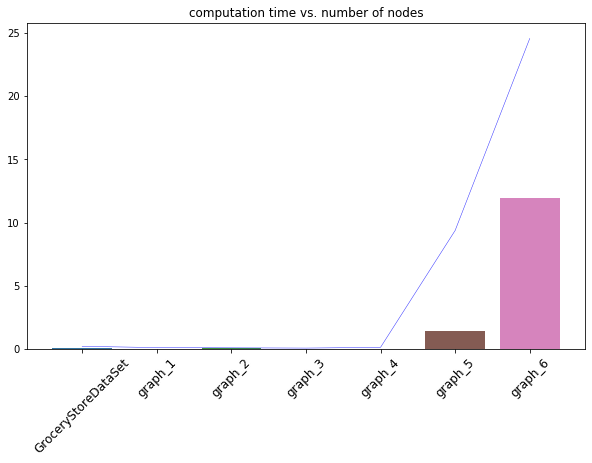

In [4]:
plt.figure(figsize=(10,6))
sns.barplot(np.arange(len(compu_time)),compu_time)
sns.lineplot(np.arange(len(compu_time)),np.array(nodes)*0.02,lw=0.5,c='b',alpha=0.8)
plt.title('computation time vs. number of nodes')
plt.xticks(np.arange(len(compu_time)),('GroceryStoreDataSet','graph_1','graph_2','graph_3','graph_4','graph_5',
                                       'graph_6'),fontsize=12,rotation=45)
plt.show()

In [5]:
compu_time

[0.0758204460144043,
 0.022666215896606445,
 0.0647435188293457,
 0.02311086654663086,
 0.0343785285949707,
 1.4068095684051514,
 11.947728633880615]

----------
## Find a way (e.g., add/delete some links) to increase hub, authority, and PageRank of Node 1 in first 3 graphs respectively.

### Increasing authority and hub

In [6]:
def plot_node_1(file):
    print('====={}====='.format(file))
    #print('HITS value of \'1\' node:\n')
    edges1_0=[]
    with open("hw3dataset/{}".format(file),'r') as f:
        for l in f.readlines():
            edges1_0.append(tuple(l.strip().split(',')))
        G1_0=nx.DiGraph()
        G1_0.add_edges_from(edges1_0)
        a,h=HITS(G1_0).rank()
        #print('original:')
        #print('authority values:',a['1'])
        #print('hub values:',h['1'])
        plt.figure(figsize=(20,12))
        width = 0.4
        x=np.arange(1,len(list(G1_0.nodes))+3)
        plt.subplot(2,1,1)
        plt.bar(x[0]-width/2, a['1'], width=width)
        plt.bar(x[0]+width/2, h['1'], width=width)
        plt.subplot(2,1,2)
        plt.bar(x[0]-width/2, a['1'], width=width)
        plt.bar(x[0]+width/2, h['1'], width=width)

        edges1_2=edges1_0.copy()
        edges1_4=edges1_0.copy()
        for i in range(1,len(list(G1_0.nodes))+1):
            edges1_1=edges1_0.copy()
            edges1_1.append((str(i),'1'))
            edges1_3=edges1_0.copy()
            edges1_3.append(('1',str(i)))
            edges1_2.append((str(i),'1'))
            edges1_4.append(('1',str(i)))
            G1_1=nx.DiGraph()
            G1_1.add_edges_from(edges1_1)
            G1_3=nx.DiGraph()
            G1_3.add_edges_from(edges1_3)
            a,h=HITS(G1_1).rank()
            #print('\nadding e({},1):'.format(i))
            #print('authority values:',a['1'])
            #print('hub values:',h['1'])
            plt.subplot(2,1,1)
            plt.bar(x[i]-width/2, a['1'], width=width)
            plt.bar(x[i]+width/2, h['1'], width=width)
            a,h=HITS(G1_3).rank()
            plt.subplot(2,1,2)
            plt.bar(x[i]-width/2, a['1'], width=width)
            plt.bar(x[i]+width/2, h['1'], width=width)

        G1_2=nx.DiGraph()
        G1_2.add_edges_from(edges1_2)
        a,h=HITS(G1_2).rank()
        #print('\nadding edges from all nodes:')
        #print('authority values:',a['1'])
        #print('hub values:',h['1'])
        plt.subplot(2,1,1)
        plt.bar(x[-1]-width/2, a['1'], width=width)
        plt.bar(x[-1]+width/2, h['1'], width=width)
        G1_4=nx.DiGraph()
        G1_4.add_edges_from(edges1_4)
        a,h=HITS(G1_4).rank()
        plt.subplot(2,1,2)
        plt.bar(x[-1]-width/2, a['1'], width=width)
        plt.bar(x[-1]+width/2, h['1'], width=width)
        if file=='graph_1.txt':
            plt.subplot(2,1,1)
            plt.title('adding edges to node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(2,1)','e(3,1)','e(4,1)','e(5,1)','e(6,1)','e(all,1)'),
                       fontsize=12)
            plt.text(len(list(G1_0.nodes))+1.5,0.7,'Left bar: authority \nRight bar: hub',fontsize=15)
            plt.subplot(2,1,2)
            plt.title('adding edges from node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(1,2)','e(1,3)','e(1,4)','e(1,5)','e(1,6)','e(1,all)'),
                       fontsize=12)
            plt.text(len(list(G1_0.nodes))+1.5,0.7,'Left bar: authority \nRight bar: hub',fontsize=15)
        elif file=='graph_2.txt':
            plt.subplot(2,1,1)
            plt.title('adding edges to node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(2,1)','e(3,1)','e(4,1)','e(5,1)','e(all,1)'),
                       fontsize=12)
            plt.text(len(list(G1_0.nodes))+1.5,0.5,'Left bar: authority \nRight bar: hub',fontsize=15)
            plt.subplot(2,1,2)
            plt.title('adding edges from node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(1,2)','e(1,3)','e(1,4)','e(1,5)','e(1,all)'),
                       fontsize=12)
            plt.text(len(list(G1_0.nodes))+1.5,0.5,'Left bar: authority \nRight bar: hub',fontsize=15)
        else:
            plt.subplot(2,1,1)
            plt.title('adding edges to node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(2,1)','e(3,1)','e(4,1)','e(all,1)'),
                       fontsize=12)
            plt.text(len(list(G1_0.nodes))+1.5,0.4,'Left bar: authority \nRight bar: hub',fontsize=15)
            plt.subplot(2,1,2)
            plt.title('adding edges from node \'1\'')
            plt.xticks(np.arange(1,x[-1]+1),('origin','e(1,1)','e(1,2)','e(1,3)','e(1,4)','e(1,all)'),
                       fontsize=12)
            plt.text(len(list(G1_0.nodes))+1.5,0.4,'Left bar: authority \nRight bar: hub',fontsize=15)
        
        plt.show()

=====graph_1.txt=====


/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the s

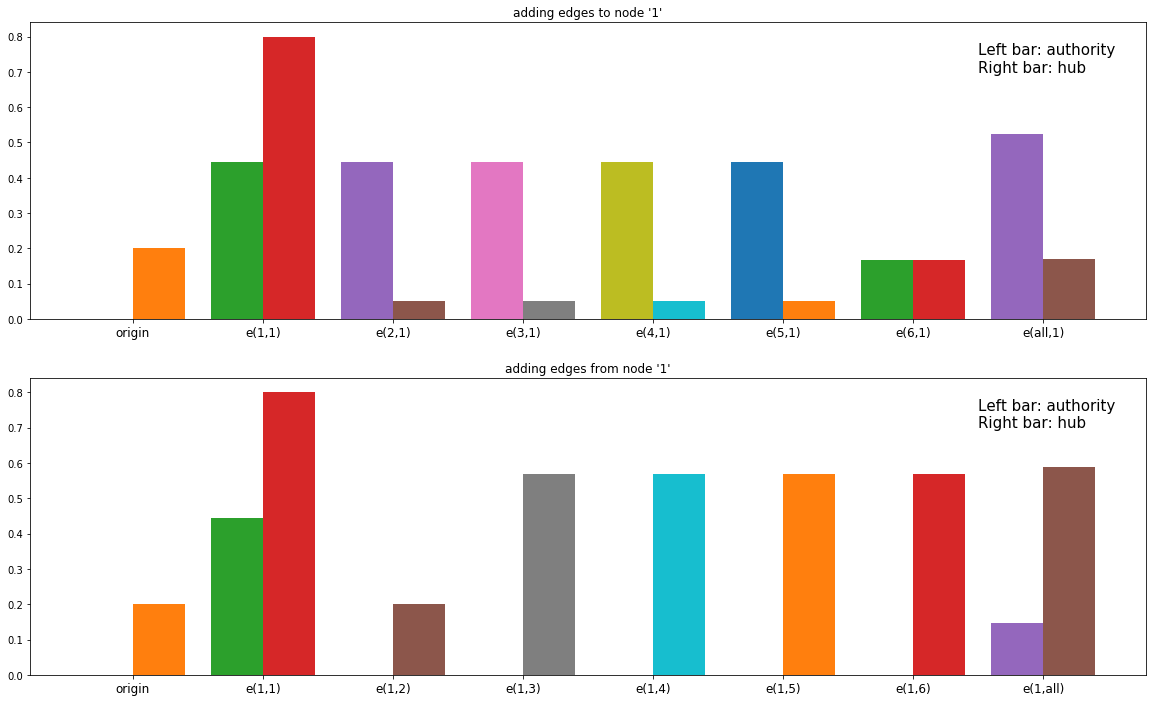

In [7]:
plot_node_1('graph_1.txt')

=====graph_2.txt=====


/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the s

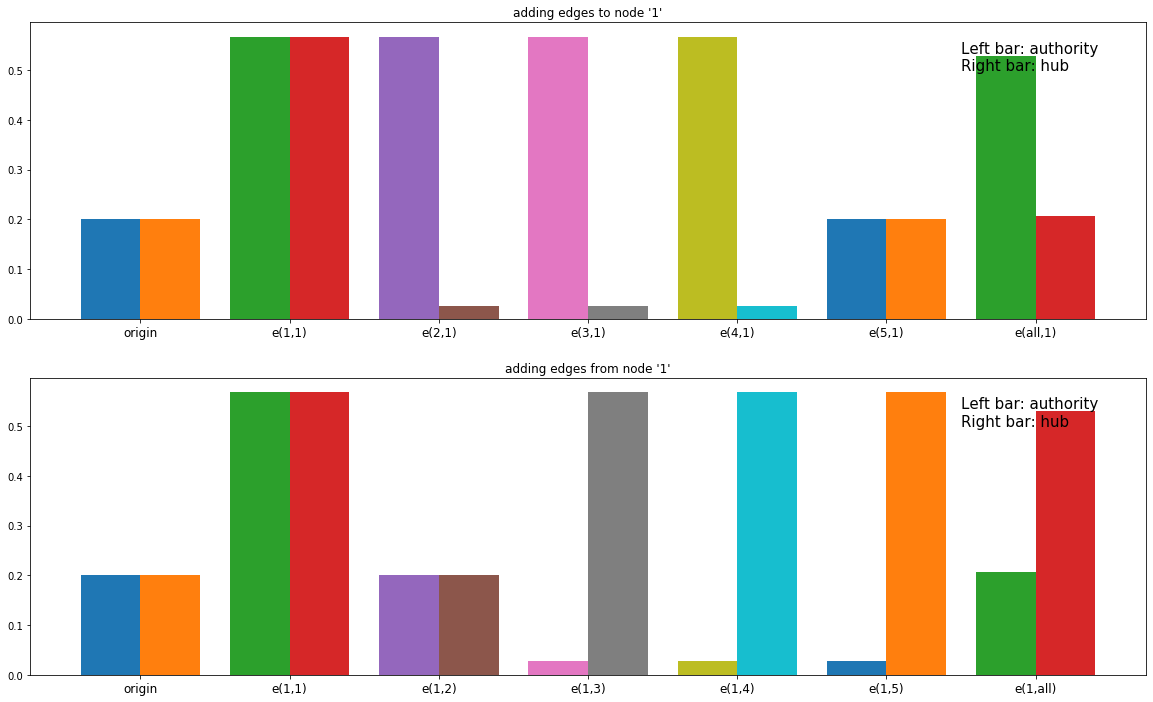

In [8]:
plot_node_1('graph_2.txt')

=====graph_3.txt=====


/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:41: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
/home/yi_chun/anaconda3/envs/ITRI_mat2vec/lib/python3.6/site-packages/ipykernel_launcher.py:55: MatplotlibDeprecationWarning: Adding an axes using the s

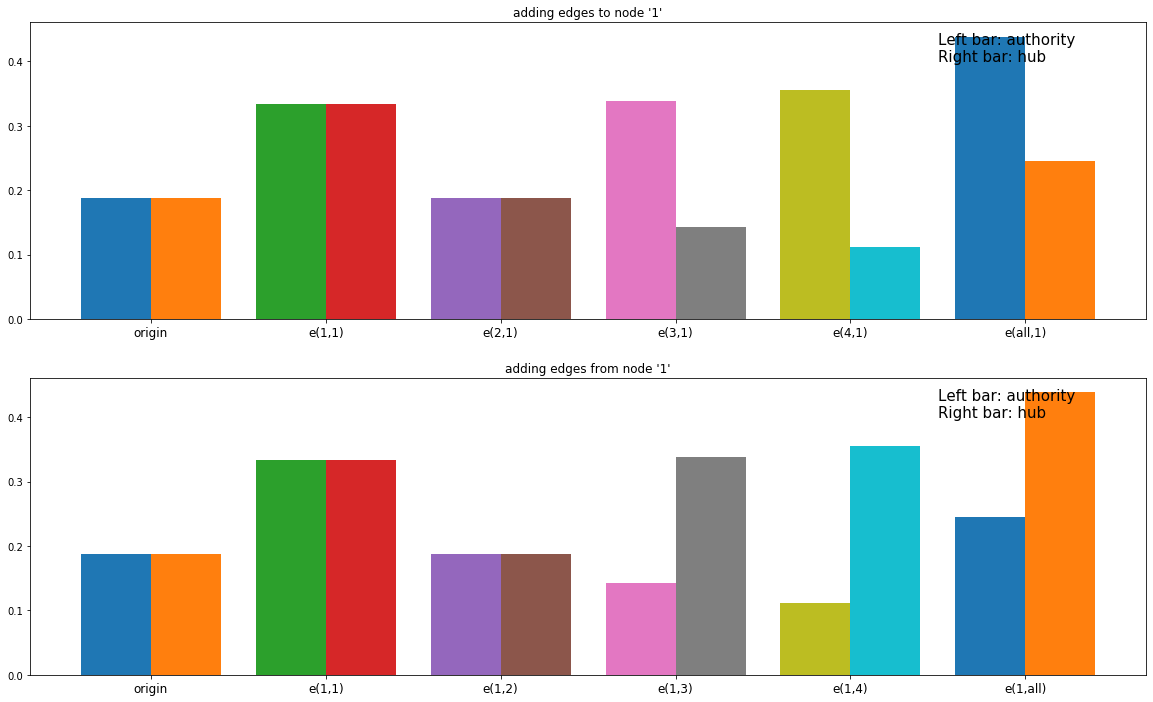

In [9]:
plot_node_1('graph_3.txt')